In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from preparing import ImageGenerator, train, test

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 64
max_dimension = 512
n_classes = 7

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(64),
 
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128 , kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(128),
 
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            nn.BatchNorm2d(256),
             
            nn.AdaptiveAvgPool2d((2,2)),
            nn.Flatten(), 
            nn.Linear(256*2*2, 200),
            nn.ReLU(),
            nn.Linear(200, n_classes),
            nn.Softmax()).to(device)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.0001,weight_decay = 0.00009)

In [ ]:
train_image_directory = 'Data/parts_train/left_eye'
valid_image_directory = 'Data/parts_val/left_eye'
train_loader = ImageGenerator(train_image_directory, batch_size=batch_size, shuffle=True, max_dimension=max_dimension)
valid_loader = ImageGenerator(valid_image_directory, batch_size=batch_size, max_dimension=max_dimension)

In [ ]:
epochs=30
path_to_save = 'left_eye.pth'
train_losses, train_accurs, valid_losses, valid_accurs = train(epochs,model,
                                                               train_loader, 
                                                               valid_loader,
                                                               loss_fn, 
                                                               optimizer,
                                                               device,
                                                               path_to_save,
                                                               patience=15)

# -------------------------------------------------------------------
plt.plot(train_losses, '-o')
plt.plot(valid_losses, '-o')

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train and Valid Loss')
plt.show()
#-------------------------------------------------------------------
plt.plot(train_accurs, '-o')
plt.plot(valid_accurs, '-o')

plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Valid'])
plt.title('Train and Valid Accuracy')
plt.show()


--------------------
Epoch 1/30


  0%|          | 0/305 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 39/39 [09:24<00:00, 14.48s/it]


Loss: 1.843 | Accuracy: 31.314
Train Loss: 2.588 | Train Accuracy: 32.563 -- Valid Loss: 1.843 | Accuracy: 31.314
--------------------
Epoch 2/30


100%|██████████| 39/39 [00:05<00:00,  7.25it/s]


Loss: 1.815 | Accuracy: 34.179
Train Loss: 2.459 | Train Accuracy: 36.325 -- Valid Loss: 1.815 | Accuracy: 34.179
--------------------
Epoch 3/30


100%|██████████| 39/39 [00:05<00:00,  7.27it/s]


Loss: 1.797 | Accuracy: 35.203
Train Loss: 2.377 | Train Accuracy: 37.939 -- Valid Loss: 1.797 | Accuracy: 35.203
--------------------
Epoch 4/30


100%|██████████| 39/39 [00:05<00:00,  7.18it/s]


Loss: 1.791 | Accuracy: 36.594
Train Loss: 2.312 | Train Accuracy: 39.364 -- Valid Loss: 1.791 | Accuracy: 36.594
--------------------
Epoch 5/30


100%|██████████| 39/39 [00:05<00:00,  7.22it/s]


Loss: 1.765 | Accuracy: 39.255
Train Loss: 2.260 | Train Accuracy: 40.522 -- Valid Loss: 1.765 | Accuracy: 39.255
--------------------
Epoch 6/30


100%|██████████| 39/39 [00:05<00:00,  7.32it/s]


Loss: 1.770 | Accuracy: 37.781
Train Loss: 2.216 | Train Accuracy: 41.183 -- Valid Loss: 1.770 | Accuracy: 37.781
Valid accuracy does not improve!!!
--------------------
Epoch 7/30


100%|██████████| 39/39 [00:05<00:00,  7.36it/s]


Loss: 1.774 | Accuracy: 37.781
Train Loss: 2.179 | Train Accuracy: 41.921 -- Valid Loss: 1.774 | Accuracy: 37.781
Valid accuracy does not improve!!!
--------------------
Epoch 8/30


100%|██████████| 39/39 [00:05<00:00,  7.33it/s]


Loss: 1.765 | Accuracy: 39.705
Train Loss: 2.144 | Train Accuracy: 42.618 -- Valid Loss: 1.765 | Accuracy: 39.705
--------------------
Epoch 9/30


100%|██████████| 39/39 [00:05<00:00,  7.52it/s]


Loss: 1.762 | Accuracy: 39.664
Train Loss: 2.113 | Train Accuracy: 43.412 -- Valid Loss: 1.762 | Accuracy: 39.664
Valid accuracy does not improve!!!
--------------------
Epoch 10/30


100%|██████████| 39/39 [00:05<00:00,  7.48it/s]


Loss: 1.746 | Accuracy: 40.688
Train Loss: 2.085 | Train Accuracy: 43.750 -- Valid Loss: 1.746 | Accuracy: 40.688
--------------------
Epoch 11/30


100%|██████████| 39/39 [00:05<00:00,  7.56it/s]


Loss: 1.741 | Accuracy: 41.015
Train Loss: 2.058 | Train Accuracy: 44.760 -- Valid Loss: 1.741 | Accuracy: 41.015
--------------------
Epoch 12/30


100%|██████████| 39/39 [00:05<00:00,  7.57it/s]


Loss: 1.733 | Accuracy: 43.062
Train Loss: 2.036 | Train Accuracy: 45.016 -- Valid Loss: 1.733 | Accuracy: 43.062
--------------------
Epoch 13/30


100%|██████████| 39/39 [00:05<00:00,  7.47it/s]


Loss: 1.732 | Accuracy: 42.161
Train Loss: 2.015 | Train Accuracy: 45.380 -- Valid Loss: 1.732 | Accuracy: 42.161
Valid accuracy does not improve!!!
--------------------
Epoch 14/30


100%|██████████| 39/39 [00:05<00:00,  7.36it/s]


Loss: 1.736 | Accuracy: 42.489
Train Loss: 1.994 | Train Accuracy: 46.092 -- Valid Loss: 1.736 | Accuracy: 42.489
Valid accuracy does not improve!!!
--------------------
Epoch 15/30


100%|██████████| 39/39 [00:05<00:00,  7.34it/s]


Loss: 1.730 | Accuracy: 43.062
Train Loss: 1.977 | Train Accuracy: 46.431 -- Valid Loss: 1.730 | Accuracy: 43.062
Valid accuracy does not improve!!!
--------------------
Epoch 16/30


100%|██████████| 39/39 [00:05<00:00,  7.46it/s]


Loss: 1.725 | Accuracy: 43.103
Train Loss: 1.959 | Train Accuracy: 46.866 -- Valid Loss: 1.725 | Accuracy: 43.103
--------------------
Epoch 17/30


100%|██████████| 39/39 [00:05<00:00,  7.18it/s]


Loss: 1.727 | Accuracy: 42.530
Train Loss: 1.943 | Train Accuracy: 47.292 -- Valid Loss: 1.727 | Accuracy: 42.530
Valid accuracy does not improve!!!
--------------------
Epoch 18/30


100%|██████████| 39/39 [00:05<00:00,  7.56it/s]


Loss: 1.722 | Accuracy: 42.734
Train Loss: 1.930 | Train Accuracy: 47.512 -- Valid Loss: 1.722 | Accuracy: 42.734
Valid accuracy does not improve!!!
--------------------
Epoch 19/30


100%|██████████| 39/39 [00:05<00:00,  7.44it/s]


Loss: 1.719 | Accuracy: 43.840
Train Loss: 1.914 | Train Accuracy: 48.342 -- Valid Loss: 1.719 | Accuracy: 43.840
--------------------
Epoch 20/30


100%|██████████| 39/39 [00:05<00:00,  7.42it/s]


Loss: 1.726 | Accuracy: 42.939
Train Loss: 1.901 | Train Accuracy: 48.506 -- Valid Loss: 1.726 | Accuracy: 42.939
Valid accuracy does not improve!!!
--------------------
Epoch 21/30


100%|██████████| 39/39 [00:05<00:00,  7.40it/s]


Loss: 1.709 | Accuracy: 44.945
Train Loss: 1.887 | Train Accuracy: 49.070 -- Valid Loss: 1.709 | Accuracy: 44.945
--------------------
Epoch 22/30


100%|██████████| 39/39 [00:05<00:00,  7.14it/s]


Loss: 1.709 | Accuracy: 44.454
Train Loss: 1.875 | Train Accuracy: 49.782 -- Valid Loss: 1.709 | Accuracy: 44.454
Valid accuracy does not improve!!!
--------------------
Epoch 23/30


100%|██████████| 39/39 [00:05<00:00,  7.18it/s]


Loss: 1.713 | Accuracy: 44.167
Train Loss: 1.865 | Train Accuracy: 49.915 -- Valid Loss: 1.713 | Accuracy: 44.167
Valid accuracy does not improve!!!
--------------------
Epoch 24/30


100%|██████████| 39/39 [00:05<00:00,  7.18it/s]


Loss: 1.711 | Accuracy: 43.758
Train Loss: 1.857 | Train Accuracy: 50.366 -- Valid Loss: 1.711 | Accuracy: 43.758
Valid accuracy does not improve!!!
--------------------
Epoch 25/30


100%|██████████| 39/39 [00:05<00:00,  7.18it/s]


Loss: 1.720 | Accuracy: 43.144
Train Loss: 1.846 | Train Accuracy: 50.725 -- Valid Loss: 1.720 | Accuracy: 43.144
Valid accuracy does not improve!!!
--------------------
Epoch 26/30


 61%|██████    | 186/305 [00:31<00:20,  5.78it/s]

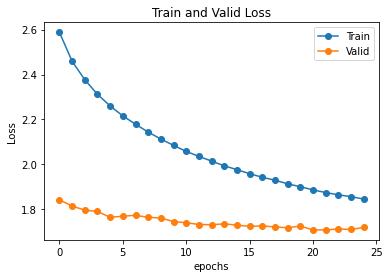

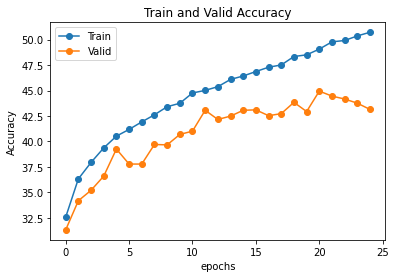

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Train_loss, '-o')
plt.plot(Valid_loss, '-o')

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train and Valid Loss')
plt.show()

plt.plot(Train_acc, '-o')
plt.plot(Valid_acc, '-o')

plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Valid'])
plt.title('Train and Valid Accuracy')
plt.show()